In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,r2_score,classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("data/Articles.csv",encoding="latin1")

In [3]:
data.shape

(2692, 4)

In [4]:
data.describe()

,Article,Date,Heading,NewsType
count,2692,2692,2692,2692
unique,2584,666,2581,2
top,strong>KARACHI: Pakistan stocks ended at a rec...,8/1/2016,Pakistan will be among top 10 emerging markets...,sports
freq,5,27,5,1408


In [5]:
data.isna().sum()

Article     0
Date        0
Heading     0
NewsType    0
dtype: int64

In [6]:
data.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [7]:
data = data.drop(['Date'],axis=1)
data.head()

,Article,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,us oil prices slip below 50 a barr,business


In [8]:
data.dtypes

Article     object
Heading     object
NewsType    object
dtype: object

In [9]:
import nltk 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/salini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/salini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/salini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## PREPROCESSING

In [10]:
articles = data.Article
articles

0       KARACHI: The Sindh government has decided to b...
1       HONG KONG: Asian markets started 2015 on an up...
2       HONG KONG:  Hong Kong shares opened 0.66 perce...
3       HONG KONG: Asian markets tumbled Tuesday follo...
4       NEW YORK: US oil prices Monday slipped below $...
                              ...                        
2687    strong>DUBAI: Dubai International Airport and ...
2688    strong>BEIJING: Former Prime Minister, Shaukat...
2689    strong>WASHINGTON: Uber has grounded its fleet...
2690    strong>BEIJING: The New Development Bank plans...
2691    strong>KARACHI: Karachi-based technology incub...
Name: Article, Length: 2692, dtype: object

In [11]:
headings = data.Heading
headings

0       sindh govt decides to cut public transport far...
1                         asia stocks up in new year trad
2                hong kong stocks open 0.66 percent lower
3                  asian stocks sink euro near nine year 
4                      us oil prices slip below 50 a barr
                              ...                        
2687      Laptop ban hits Dubai for 11m weekend traveller
2688    Pak China relations not against any third coun...
2689           Uber grounds self driving cars after accid
2690    New Development Bank plans joint investments i...
2691    Google powered Startup Weekend energizing prou...
Name: Heading, Length: 2692, dtype: object

## TOKENIZATION

In [12]:
from nltk import TweetTokenizer
tk = TweetTokenizer()
articles = articles.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))
articles

0       KARACHI : The Sindh government has decided to ...
1       HONG KONG : Asian markets started 2015 on an u...
2       HONG KONG : Hong Kong shares opened 0.66 perce...
3       HONG KONG : Asian markets tumbled Tuesday foll...
4       NEW YORK : US oil prices Monday slipped below ...
                              ...                        
2687    strong > DUBAI : Dubai International Airport a...
2688    strong > BEIJING : Former Prime Minister , Sha...
2689    strong > WASHINGTON : Uber has grounded its fl...
2690    strong > BEIJING : The New Development Bank pl...
2691    strong > KARACHI : Karachi-based technology in...
Name: Article, Length: 2692, dtype: object

In [13]:
headings = headings.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))
headings

0       sindh govt decides to cut public transport far...
1                         asia stocks up in new year trad
2                hong kong stocks open 0.66 percent lower
3                   asian stocks sink euro near nine year
4                      us oil prices slip below 50 a barr
                              ...                        
2687      Laptop ban hits Dubai for 11m weekend traveller
2688    Pak China relations not against any third coun...
2689           Uber grounds self driving cars after accid
2690    New Development Bank plans joint investments i...
2691    Google powered Startup Weekend energizing prou...
Name: Heading, Length: 2692, dtype: object

## REMOVING PUNCTUATIONS

In [14]:
articles = articles.str.replace('[^a-zA-Z]+', ' ')
articles

0       KARACHI The Sindh government has decided to br...
1       HONG KONG Asian markets started on an upswing ...
2       HONG KONG Hong Kong shares opened percent lowe...
3       HONG KONG Asian markets tumbled Tuesday follow...
4       NEW YORK US oil prices Monday slipped below a ...
                              ...                        
2687    strong DUBAI Dubai International Airport and i...
2688    strong BEIJING Former Prime Minister Shaukat A...
2689    strong WASHINGTON Uber has grounded its fleet ...
2690    strong BEIJING The New Development Bank plans ...
2691    strong KARACHI Karachi based technology incuba...
Name: Article, Length: 2692, dtype: object

In [15]:
headings = headings.str.replace('[^a-zA-Z]+', ' ')
headings

0       sindh govt decides to cut public transport far...
1                         asia stocks up in new year trad
2                     hong kong stocks open percent lower
3                   asian stocks sink euro near nine year
4                         us oil prices slip below a barr
                              ...                        
2687        Laptop ban hits Dubai for m weekend traveller
2688    Pak China relations not against any third coun...
2689           Uber grounds self driving cars after accid
2690    New Development Bank plans joint investments i...
2691    Google powered Startup Weekend energizing prou...
Name: Heading, Length: 2692, dtype: object

## REMOVING SHORTWORDS

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
articles = articles.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) > 3]))
articles

0       KARACHI Sindh government decided bring down pu...
1       HONG KONG Asian markets started upswing limite...
2       HONG KONG Hong Kong shares opened percent lowe...
3       HONG KONG Asian markets tumbled Tuesday follow...
4       YORK prices Monday slipped below barrel first ...
                              ...                        
2687    strong DUBAI Dubai International Airport flag ...
2688    strong BEIJING Former Prime Minister Shaukat A...
2689    strong WASHINGTON Uber grounded fleet self dri...
2690    strong BEIJING Development Bank plans finance ...
2691    strong KARACHI Karachi based technology incuba...
Name: Article, Length: 2692, dtype: object

In [18]:
headings = headings.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) > 3]))
headings

0               sindh govt decides public transport fares
1                                   asia stocks year trad
2                     hong kong stocks open percent lower
3                   asian stocks sink euro near nine year
4                                  prices slip below barr
                              ...                        
2687                  Laptop hits Dubai weekend traveller
2688    China relations against third country Shaukat ...
2689           Uber grounds self driving cars after accid
2690    Development Bank plans joint investments econo...
2691    Google powered Startup Weekend energizing prou...
Name: Heading, Length: 2692, dtype: object

## STEMMING

In [19]:
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer('english')
articles = articles.apply(lambda x: [stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))
articles

0       karachi sindh govern decid bring down public t...
1       hong kong asian market start upsw limit trade ...
2       hong kong hong kong share open percent lower m...
3       hong kong asian market tumbl tuesday follow pa...
4       york price monday slip below barrel first time...
                              ...                        
2687    strong dubai dubai intern airport flag carrier...
2688    strong beij former prime minist shaukat aziz s...
2689    strong washington uber ground fleet self drive...
2690    strong beij develop bank plan financ infrastru...
2691    strong karachi karachi base technolog incub ne...
Name: Article, Length: 2692, dtype: object

In [20]:
headings = headings.apply(lambda x: [stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))
headings

0                  sindh govt decid public transport fare
1                                    asia stock year trad
2                      hong kong stock open percent lower
3                    asian stock sink euro near nine year
4                                   price slip below barr
                              ...                        
2687                      laptop hit dubai weekend travel
2688       china relat against third countri shaukat aziz
2689               uber ground self drive car after accid
2690    develop bank plan joint invest economi along b...
2691    googl power startup weekend energ proud pakist...
Name: Heading, Length: 2692, dtype: object

## REMOVING STOP WORDS

In [21]:
from nltk.corpus import stopwords 
stop = stopwords.words('english')
articles = articles.apply(lambda x: [i for i in word_tokenize(x) if i not in stop]).apply(lambda x: ' '.join(x))
articles

0       karachi sindh govern decid bring public transp...
1       hong kong asian market start upsw limit trade ...
2       hong kong hong kong share open percent lower m...
3       hong kong asian market tumbl tuesday follow pa...
4       york price monday slip barrel first time five ...
                              ...                        
2687    strong dubai dubai intern airport flag carrier...
2688    strong beij former prime minist shaukat aziz s...
2689    strong washington uber ground fleet self drive...
2690    strong beij develop bank plan financ infrastru...
2691    strong karachi karachi base technolog incub ne...
Name: Article, Length: 2692, dtype: object

In [22]:
headings = headings.apply(lambda x: [i for i in word_tokenize(x) if i not in stop]).apply(lambda x: ' '.join(x))
headings

0                  sindh govt decid public transport fare
1                                    asia stock year trad
2                      hong kong stock open percent lower
3                    asian stock sink euro near nine year
4                                         price slip barr
                              ...                        
2687                      laptop hit dubai weekend travel
2688               china relat third countri shaukat aziz
2689                     uber ground self drive car accid
2690    develop bank plan joint invest economi along b...
2691    googl power startup weekend energ proud pakist...
Name: Heading, Length: 2692, dtype: object

In [23]:
data.Article = articles
data

,Article,Heading,NewsType
0,karachi sindh govern decid bring public transp...,sindh govt decides to cut public transport far...,business
1,hong kong asian market start upsw limit trade ...,asia stocks up in new year trad,business
2,hong kong hong kong share open percent lower m...,hong kong stocks open 0.66 percent lower,business
3,hong kong asian market tumbl tuesday follow pa...,asian stocks sink euro near nine year,business
4,york price monday slip barrel first time five ...,us oil prices slip below 50 a barr,business
...,...,...,...
2687,strong dubai dubai intern airport flag carrier...,Laptop ban hits Dubai for 11m weekend traveller,business
2688,strong beij former prime minist shaukat aziz s...,Pak China relations not against any third coun...,business
2689,strong washington uber ground fleet self drive...,Uber grounds self driving cars after accid,business
2690,strong beij develop bank plan financ infrastru...,New Development Bank plans joint investments i...,business


In [24]:
data.Heading = headings
data

,Article,Heading,NewsType
0,karachi sindh govern decid bring public transp...,sindh govt decid public transport fare,business
1,hong kong asian market start upsw limit trade ...,asia stock year trad,business
2,hong kong hong kong share open percent lower m...,hong kong stock open percent lower,business
3,hong kong asian market tumbl tuesday follow pa...,asian stock sink euro near nine year,business
4,york price monday slip barrel first time five ...,price slip barr,business
...,...,...,...
2687,strong dubai dubai intern airport flag carrier...,laptop hit dubai weekend travel,business
2688,strong beij former prime minist shaukat aziz s...,china relat third countri shaukat aziz,business
2689,strong washington uber ground fleet self drive...,uber ground self drive car accid,business
2690,strong beij develop bank plan financ infrastru...,develop bank plan joint invest economi along b...,business


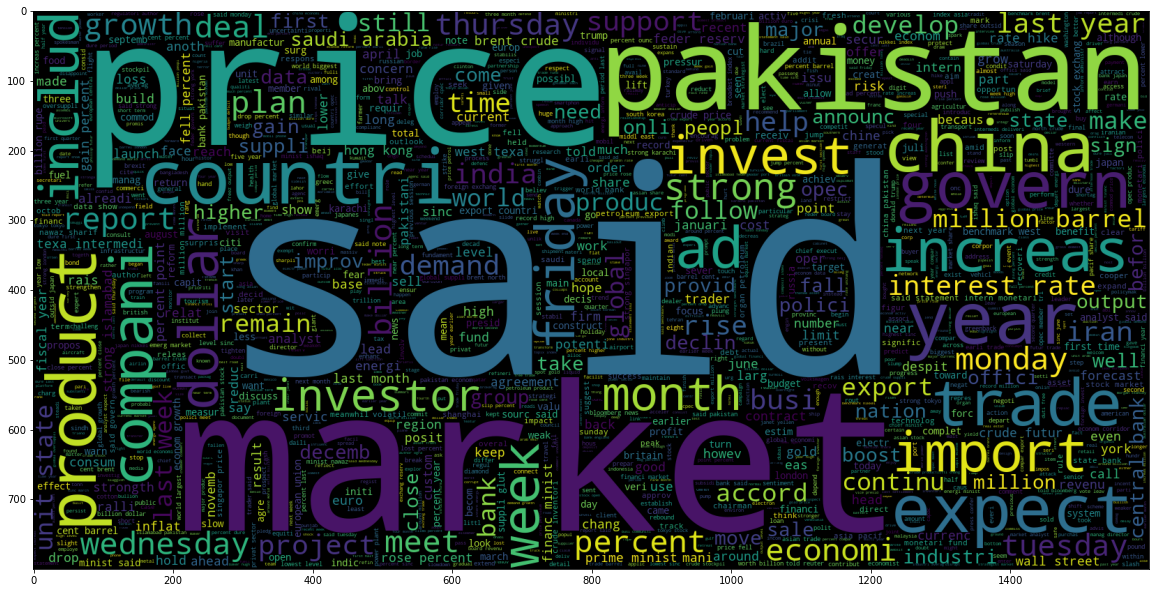

In [25]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.NewsType == 'business'].Article))
plt.imshow(wc)

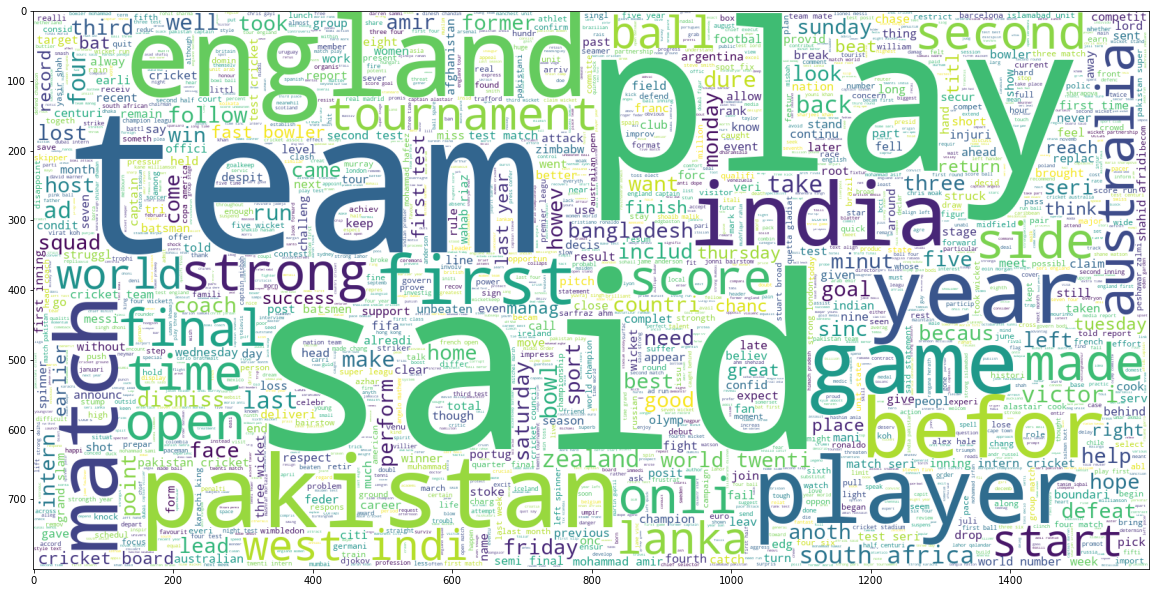

In [26]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800,background_color='white').generate(" ".join(data[data.NewsType == 'sports'].Article))
plt.imshow(wc)

## TFIDF VECTORIZATION

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = stop)
X = vec.fit_transform(data['Article'],data['Heading'])

In [28]:
y = data['NewsType']
y = y.values
y

array(['business', 'business', 'business', ..., 'business', 'business',
       'business'], dtype=object)

## SPLITTING TRAIN & TEST DATA

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state=42)

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

# MODELS

## 1. LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression 
model1 = LogisticRegression()
model1.fit(X_res, y_res)
y_predLR = model1.predict(X_test)

In [32]:
y_predLR

array(['sports', 'sports', 'sports', 'business', 'sports', 'business',
       'business', 'business', 'sports', 'business', 'business', 'sports',
       'business', 'business', 'sports', 'sports', 'business', 'business',
       'sports', 'sports', 'business', 'sports', 'business', 'sports',
       'sports', 'business', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'business', 'business', 'business',
       'business', 'business', 'sports', 'business', 'sports', 'business',
       'sports', 'sports', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'sports', 'sports', 'sports', 'business',
       'sports', 'sports', 'sports', 'sports', 'business', 'business',
       'sports', 'sports', 'sports', 'sports', 'sports', 'business',
       'business', 'business', 'business', 'business', 'sports', 'sports',
       'business', 'sports', 'sports', 'sports', 'sports', 'sports',
       'business', 'business', 'business', 'sports', 'sports', 's

In [33]:
y_test

array(['sports', 'sports', 'sports', 'business', 'sports', 'business',
       'business', 'business', 'sports', 'business', 'business', 'sports',
       'business', 'business', 'sports', 'sports', 'business', 'business',
       'sports', 'sports', 'business', 'sports', 'business', 'sports',
       'sports', 'business', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'business', 'business', 'business',
       'business', 'business', 'sports', 'business', 'sports', 'business',
       'sports', 'sports', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'sports', 'sports', 'sports', 'business',
       'sports', 'sports', 'sports', 'sports', 'business', 'sports',
       'sports', 'sports', 'sports', 'sports', 'sports', 'business',
       'business', 'business', 'business', 'business', 'sports', 'sports',
       'business', 'sports', 'sports', 'sports', 'sports', 'sports',
       'business', 'business', 'business', 'sports', 'sports', 'spo

In [34]:
accuracy = accuracy_score(y_test,y_predLR)*100
accuracy

99.44341372912801

In [35]:
confusion_matrix(y_test,y_predLR)

array([[256,   1],
       [  2, 280]])

In [36]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

    business       0.99      1.00      0.99       257
      sports       1.00      0.99      0.99       282

    accuracy                           0.99       539
   macro avg       0.99      0.99      0.99       539
weighted avg       0.99      0.99      0.99       539



## 2. RANDOM FOREST CLASSIFIER

In [37]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_res, y_res)
y_predRFC = model2.predict(X_test)

In [38]:
y_predRFC

array(['sports', 'sports', 'sports', 'business', 'sports', 'business',
       'business', 'business', 'sports', 'business', 'business', 'sports',
       'business', 'business', 'sports', 'sports', 'business', 'business',
       'sports', 'sports', 'business', 'sports', 'business', 'sports',
       'sports', 'business', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'business', 'business', 'business',
       'business', 'business', 'sports', 'business', 'sports', 'business',
       'sports', 'sports', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'sports', 'sports', 'sports', 'business',
       'sports', 'sports', 'sports', 'sports', 'business', 'business',
       'sports', 'sports', 'sports', 'sports', 'sports', 'business',
       'business', 'business', 'business', 'business', 'sports', 'sports',
       'business', 'sports', 'sports', 'sports', 'sports', 'sports',
       'business', 'business', 'business', 'sports', 'sports', 's

In [39]:
y_test

array(['sports', 'sports', 'sports', 'business', 'sports', 'business',
       'business', 'business', 'sports', 'business', 'business', 'sports',
       'business', 'business', 'sports', 'sports', 'business', 'business',
       'sports', 'sports', 'business', 'sports', 'business', 'sports',
       'sports', 'business', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'business', 'business', 'business',
       'business', 'business', 'sports', 'business', 'sports', 'business',
       'sports', 'sports', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'sports', 'sports', 'sports', 'business',
       'sports', 'sports', 'sports', 'sports', 'business', 'sports',
       'sports', 'sports', 'sports', 'sports', 'sports', 'business',
       'business', 'business', 'business', 'business', 'sports', 'sports',
       'business', 'sports', 'sports', 'sports', 'sports', 'sports',
       'business', 'business', 'business', 'sports', 'sports', 'spo

In [40]:
accuracy = accuracy_score(y_test,y_predRFC)*100
accuracy

99.25788497217069

In [41]:
confusion_matrix(y_test,y_predRFC)

array([[257,   0],
       [  4, 278]])

In [42]:
print(classification_report(y_test,y_predRFC))

              precision    recall  f1-score   support

    business       0.98      1.00      0.99       257
      sports       1.00      0.99      0.99       282

    accuracy                           0.99       539
   macro avg       0.99      0.99      0.99       539
weighted avg       0.99      0.99      0.99       539



## 3. SUPPORT VECTOR MACHINE

In [43]:
from sklearn.svm import SVC  
model3= SVC()
model3.fit(X_res,y_res)
y_predSVM = model3.predict(X_test)

In [44]:
y_predSVM

array(['sports', 'sports', 'sports', 'business', 'sports', 'business',
       'business', 'business', 'sports', 'business', 'business', 'sports',
       'business', 'business', 'sports', 'sports', 'business', 'business',
       'sports', 'sports', 'business', 'sports', 'business', 'sports',
       'sports', 'business', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'business', 'business', 'business',
       'business', 'business', 'sports', 'business', 'sports', 'business',
       'sports', 'sports', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'sports', 'sports', 'sports', 'business',
       'sports', 'sports', 'sports', 'sports', 'business', 'business',
       'sports', 'sports', 'sports', 'sports', 'sports', 'business',
       'business', 'business', 'business', 'business', 'sports', 'sports',
       'business', 'sports', 'sports', 'sports', 'sports', 'sports',
       'business', 'business', 'business', 'sports', 'sports', 's

In [45]:
y_test


array(['sports', 'sports', 'sports', 'business', 'sports', 'business',
       'business', 'business', 'sports', 'business', 'business', 'sports',
       'business', 'business', 'sports', 'sports', 'business', 'business',
       'sports', 'sports', 'business', 'sports', 'business', 'sports',
       'sports', 'business', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'business', 'business', 'business',
       'business', 'business', 'sports', 'business', 'sports', 'business',
       'sports', 'sports', 'business', 'business', 'sports', 'business',
       'sports', 'business', 'sports', 'sports', 'sports', 'business',
       'sports', 'sports', 'sports', 'sports', 'business', 'sports',
       'sports', 'sports', 'sports', 'sports', 'sports', 'business',
       'business', 'business', 'business', 'business', 'sports', 'sports',
       'business', 'sports', 'sports', 'sports', 'sports', 'sports',
       'business', 'business', 'business', 'sports', 'sports', 'spo

In [46]:
accuracy = accuracy_score(y_test,y_predSVM)*100
accuracy

99.81447124304268

In [47]:
confusion_matrix(y_test,y_predSVM)

array([[257,   0],
       [  1, 281]])

In [48]:
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

    business       1.00      1.00      1.00       257
      sports       1.00      1.00      1.00       282

    accuracy                           1.00       539
   macro avg       1.00      1.00      1.00       539
weighted avg       1.00      1.00      1.00       539



In [53]:
with open('modelSVM', 'wb') as picklefile:  
    pickle.dump(model3,picklefile)


In [54]:
with open('modelSVM', 'rb') as training_model:  
    model = pickle.load(training_model)  
